# Лабораторная работа №4 Белоцкий Дмитрий 

# Задание 1.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas 

In [16]:
def f_0(x):
    return np.exp(2 * x) * np.cos(3 * x)

def f_1(x):
    return np.sin(np.log(x))

def f_2(x):
    return np.log(x)

def f_3(x):
    return np.sin(x) + np.cos(x)

In [17]:
def lagrange_interpolation(x, points_x, points_y):
    L_i = 0
    for i in range(len(points_x)):
        l_i=1
        for j in range(len(points_x)):
            if i != j:
                l_i *= (x-points_x[j])/(points_x[i]-points_x[j])
        L_i += l_i*points_y[i]
    return L_i

In [18]:
def newton_interpolation(x, points_x, points_y):
    p_n = 0
    for n in range(len(points_x)+1):
        f = 0
        for i in range(n):
            p = 1
            for l in range(n):
                if i != l:
                    p *= (points_x[i]-points_x[l])
            f += (points_y[i]/p)
        for i in range(n-1):
            f *= (x - points_x[i])
        p_n += f
    return p_n

In [19]:
def spline_interpolation(x, points_x, points_y):
    n = len(points_x)
    h = np.diff(points_x)
    df = np.diff(points_y)
    A = np.zeros((n, n))
    B = np.zeros((n, ))
    A[0, 0] = 1
    A[n-1, n-1] = 1
    for i in range(1, n-1):
        A[i, i - 1] = h[i-1]
        A[i][i] = 2 * (h[i-1] + h[i])
        A[i, i + 1] = h[i]
        B[i] = 3 * (df[i] / h[i] - df[i - 1] / h[i - 1])
    c = np.linalg.solve(A, B)
    d = np.zeros((n - 1,))
    b = np.zeros((n - 1,))
    for i in range(0, len(d)):
        d[i] = (c[i + 1] - c[i]) / (3 * h[i])
        b[i] = (df[i] / h[i]) - (h[i] / 3) * (2 * c[i] + c[i + 1])
    if x <= points_x[0]:
        return points_y[0] + b[0] * (x - points_x[0]) + c[0] * (x - points_x[0]) ** 2 + d[0] * (
                    x - points_x[0]) ** 3
    for i in range(0, n-1):
        if points_x[i] <= x <= points_x[i+1]:
            return points_y[i] + b[i]*(x - points_x[i]) + c[i] * (x - points_x[i])**2+d[i]*(x - points_x[i])**3
    return points_y[n-2] + b[n-2]*(x - points_x[n-2]) + c[n-2] * (x - points_x[n-2])**2+d[n-2]*(x - points_x[n-2])**3

Функция 1:
В точке 0.25
	Реальное значение:      1.2063510016467855
	Полином Лагранжа:       1.2507915593901018
	Полином Ньютона:        1.2507915593901018
	Интерполяция сплайнами: 1.239103874558713
В точке 0.51
	Реальное значение:      0.11310477962340527
	Полином Лагранжа:       0.023819252859356876
	Полином Ньютона:        0.02381925285935682
	Интерполяция сплайнами: -0.05040222089389371
В точке 0.99
	Реальное значение:      -7.136376555330972
	Полином Лагранжа:       -6.2267674159915165
	Полином Ньютона:        -6.226767415991516
	Интерполяция сплайнами: -2.7545152050996506
В точке 1.09
	Реальное значение:      -8.773475489233858
	Полином Лагранжа:       -8.179743263413837
	Полином Ньютона:        -8.179743263413835
	Интерполяция сплайнами: -2.4610245264504194
В точке 1.89
	Реальное значение:      35.83359599091905
	Полином Лагранжа:       -31.88207779824823
	Полином Ньютона:        -31.882077798248226
	Интерполяция сплайнами: 29.10424295164207
В точке 2.39
	Реальное значение:     

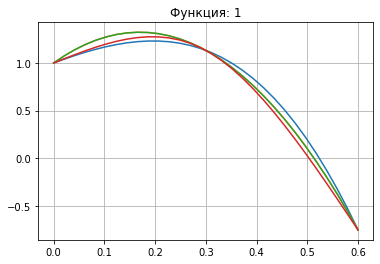

Функция 2:
В точке 0.25
	Реальное значение:      -0.9830277404112437
	Полином Лагранжа:       -0.41641205275364257
	Полином Ньютона:        -0.41641205275363496
	Интерполяция сплайнами: 0.9045263148397967
В точке 0.51
	Реальное значение:      -0.623604042277235
	Полином Лагранжа:       -0.2090059608832462
	Полином Ньютона:        -0.20900596088324275
	Интерполяция сплайнами: 0.6601094744738695
В точке 0.99
	Реальное значение:      -0.010050166658206879
	Полином Лагранжа:       0.127496252501766
	Полином Ньютона:        0.1274962525017673
	Интерполяция сплайнами: 0.45538550776544656
В точке 1.09
	Реальное значение:      0.0860710680302494
	Полином Лагранжа:       0.1900240847707133
	Полином Ньютона:        0.19002408477071472
	Интерполяция сплайнами: 0.4450307722701382
В точке 1.89
	Реальное значение:      0.5944462368502892
	Полином Лагранжа:       0.5961899709548901
	Полином Ньютона:        0.5961899709548899
	Интерполяция сплайнами: 0.6008619471749582
В точке 2.39
	Реальное значение:

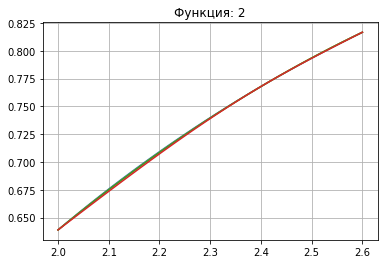

Функция 3:
В точке 0.25
	Реальное значение:      -1.3862943611198906
	Полином Лагранжа:       -1.0970886486207583
	Полином Ньютона:        -1.0970886486207558
	Интерполяция сплайнами: -0.043271000666756154
В точке 0.51
	Реальное значение:      -0.6733445532637656
	Полином Лагранжа:       -0.625563962937723
	Полином Ньютона:        -0.62556396293772
	Интерполяция сплайнами: -0.2842936212125159
В точке 0.99
	Реальное значение:      -0.01005033585350145
	Полином Лагранжа:       -0.010030245266729217
	Полином Ньютона:        -0.010030245266729215
	Интерполяция сплайнами: -0.009691461973044747
В точке 1.09
	Реальное значение:      0.08617769624105241
	Полином Лагранжа:       0.08616989000796907
	Полином Ньютона:        0.08616989000796905
	Интерполяция сплайнами: 0.08605629235658634
В точке 1.89
	Реальное значение:      0.636576829071551
	Полином Лагранжа:       0.6538267743446688
	Полином Ньютона:        0.6538267743446672
	Интерполяция сплайнами: 0.815691004145503
В точке 2.39
	Реальное з

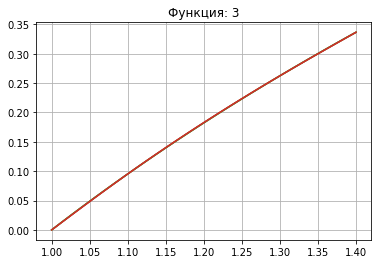

Функция 4:
В точке 0.25
	Реальное значение:      1.2163163809651676
	Полином Лагранжа:       1.2163163809651676
	Полином Ньютона:        1.2163163809651676
	Интерполяция сплайнами: 1.2163163809651676
В точке 0.51
	Реальное значение:      1.3609217545286587
	Полином Лагранжа:       1.3609576005983683
	Полином Ньютона:        1.3609576005983683
	Интерполяция сплайнами: 1.3604569417145296
В точке 0.99
	Реальное значение:      1.3847158391821082
	Полином Лагранжа:       1.384918739199954
	Полином Ньютона:        1.3849187391999542
	Интерполяция сплайнами: 1.3827995061474834
В точке 1.09
	Реальное значение:      1.349112281324788
	Полином Лагранжа:       1.3463559790626423
	Полином Ньютона:        1.3463559790626423
	Интерполяция сплайнами: 1.3729757243333949
В точке 1.89
	Реальное значение:      0.6356750555057482
	Полином Лагранжа:       0.41836490681612126
	Полином Ньютона:        0.4183649068161265
	Интерполяция сплайнами: 1.71960718319134
В точке 2.39
	Реальное значение:      -0.047799

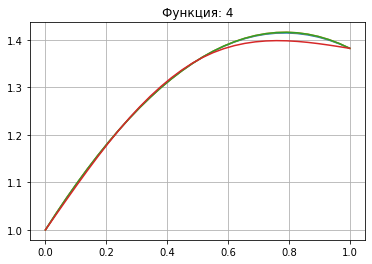

In [20]:
funcs = [f_0, f_1, f_2, f_3]
points_x = np.array([[0, 0.3, 0.6], [2.0, 2.4, 2.6], [1, 1.1, 1.3, 1.4], [0, 0.25, 0.5, 1]])
input_x = [0.25, 0.51, 0.99, 1.09, 1.89, 2.39]
for n in range(0,len(funcs)):
    print('Функция ' + str(n+1) + ":")
    for i in range(len(input_x)):
        points_f = []
        for j in range(len(points_x[n])):
            points_f.append(funcs[n](points_x[n][j]))
        print('В точке ' + str(input_x[i]))
        print('\tРеальное значение:      ' + str(funcs[n](input_x[i])))
        print('\tПолином Лагранжа:       ' + str(lagrange_interpolation(input_x[i], points_x[n], points_f)))
        print('\tПолином Ньютона:        ' + str(newton_interpolation(input_x[i], points_x[n], points_f)))
        print('\tИнтерполяция сплайнами: ' + str(spline_interpolation(input_x[i], points_x[n], points_f)))
    x = np.linspace(points_x[n][0], points_x[n][-1], 30)
    func = [funcs[n](i) for i in x]
    y1 = [lagrange_interpolation(i, points_x[n], points_f) for i in x]
    y2 = [newton_interpolation(i, points_x[n], points_f) for i in x]
    y3 = [spline_interpolation(i, points_x[n], points_f) for i in x]
    plt.title("Функция: " + str(n+1))
    plt.grid()
    plt.plot(x, func, x, y1, x, y2, x, y3)
    plt.show()

# Задание 2.

In [21]:
def MNK_interpolation(x, points_x, points_y):
    n = len(points_x)
    k = 10
    X = np.ones((n, k))
    y = np.array(points_y)
    for i in range(n):
        for j in range(k):
            X[i][j] = points_x[i]**j
    A = np.dot(X.transpose(), X)
    y = np.dot(X.transpose(), y)
    a = np.linalg.solve(A, y)
    ans = 0
    for i in range(k):
        ans += a[i] * x**i
    return ans

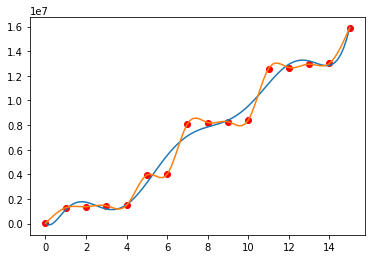

In [29]:
files = os.listdir('./coivd_stat/csse_covid_19_daily_reports')
cases = []
weeks = []
for file in files[::7]:
    f = pandas.read_csv('./coivd_stat/csse_covid_19_daily_reports/' + file)
    cases.append(np.sum(f['Confirmed']))

weeks = np.array(range(len(cases)))
cases = np.array(np.cumsum(cases))
plt.plot(weeks, cases,'ro')
x = np.linspace(weeks[0], weeks[-1], 100)
y1 = [MNK_interpolation(i, weeks, cases) for i in x]
y2 = [spline_interpolation(i, weeks, cases) for i in x]
plt.plot(x, y1, x, y2)
plt.show()

# Задание 3

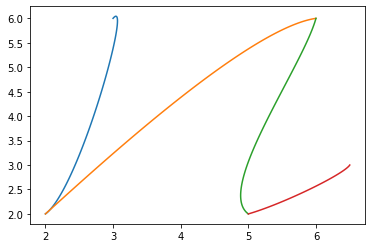

In [31]:
from math import factorial as fact


def bezier_curve(points_x, points_y):
    def B_t(points_x, points_y, t):
        n = len(points_x)-1
        x_t = 0
        y_t = 0
        for k in range(len(points_x)):
            x_t += points_x[k] * fact(n) / (fact(k) * fact(n - k)) * t ** k * (1 - t) ** (n - k)
            y_t += points_y[k] * fact(n) / (fact(k) * fact(n - k)) * t ** k * (1 - t) ** (n - k)
        return x_t, y_t
    x = []
    y = []
    for t in np.linspace(0, 1, 100):
        x_t, y_t = B_t(points_x, points_y, t)
        x.append(x_t)
        y.append(y_t)
    return x, y


x1, y1 = bezier_curve([3, 3.3, 2.5, 2], [6, 6.5, 2.5, 2])
x2, y2 = bezier_curve([2, 2.8, 5, 6], [2, 3, 5.8, 6])
x3, y3 = bezier_curve([6, 5.8, 4.5, 5], [6, 5, 2.5, 2])
x4, y4 = bezier_curve([5, 5.5, 6.4, 6.5], [2, 2.2, 2.8, 3])
plt.plot(x1, y1, x2, y2, x3, y3, x4, y4)
plt.show()

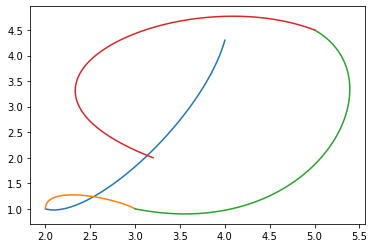

In [46]:
x1, y1 = bezier_curve([4, 3.75, 2.5 , 2], [4.3, 2.75, 0.75, 1])
x2, y2 = bezier_curve([2, 2, 2.8, 3], [1, 1.5, 1.2, 1])
x3, y3 = bezier_curve([3,5,6,5], [1,0.3,3.5,4.5])
x4, y4 = bezier_curve([5, 3.5, 1, 3.2], [4.5, 5.5, 3.5, 2])
plt.plot(x1, y1, x2, y2, x3, y3, x4, y4)
plt.show()